In [8]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
import numpy as np

In [3]:
image=imread('/content/house.jpg')
grayimg= rgb2gray(image)

# Original Image

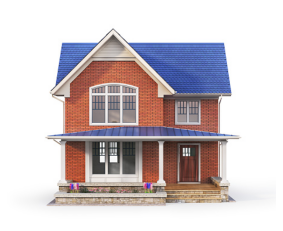

In [4]:
plt.imshow(image)
plt.axis("off")
plt.show()

# Gray Image

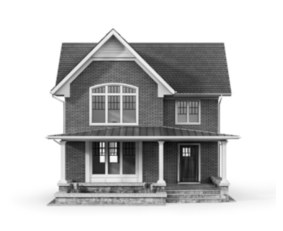

In [47]:
plt.imshow(grayimg, cmap="gray")
plt.axis("off")
plt.show()

In [46]:
grayimg=cv2.GaussianBlur(grayimg, (3,3), sigmaX=1)

In [6]:
from scipy import signal as sig

In [ ]:
#pad_img = np.zeros((grayimg.shape[0]+2, grayimg.shape[1]+2), dtype=int)
#pad_img[1:-1, 1:-1] = grayimg[:,:]

In [ ]:
#print(pad_img)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [48]:
kernel_x = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
kernel_y = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
    ])
I_x =cv2.filter2D(src=grayimg, ddepth=-1, kernel=kernel_x)
I_y=cv2.filter2D(src=grayimg, ddepth=-1, kernel=kernel_y)

In [49]:
grayimg.shape

(373, 461)

In [50]:
Ixx.shape

(373, 461)

In [51]:
Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

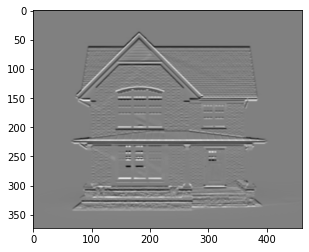

In [52]:
plt.imshow(I_x, cmap='gray')


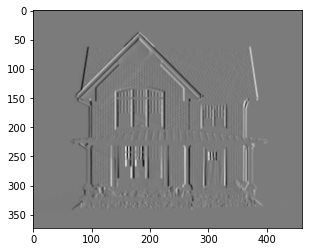

In [53]:
plt.imshow(I_y, cmap='gray')

In [54]:
#from scipy import signal as sig
#import numpy as np

#def gradient_x(grayimg):
    ##Sobel operator kernels.
 #   kernel_x = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
 #   return sig.convolve2d(grayimg, kernel_x, mode='same')
#def gradient_y(grayimg):
 #   kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  #  return sig.convolve2d(grayimg, kernel_y, mode='same')


#I_x1 = gradient_x(grayimg)
#I_y1 = gradient_y(grayimg)    

# Harris response calculation

In [55]:
k = 0.15

# determinant
detC = Ixx * Iyy - Ixy ** 2
# trace
traceC = Ixx + Iyy
    
harris_response = detC - k * traceC ** 2

In [61]:
th = 0.03
a = np.argwhere(harris_response > th)

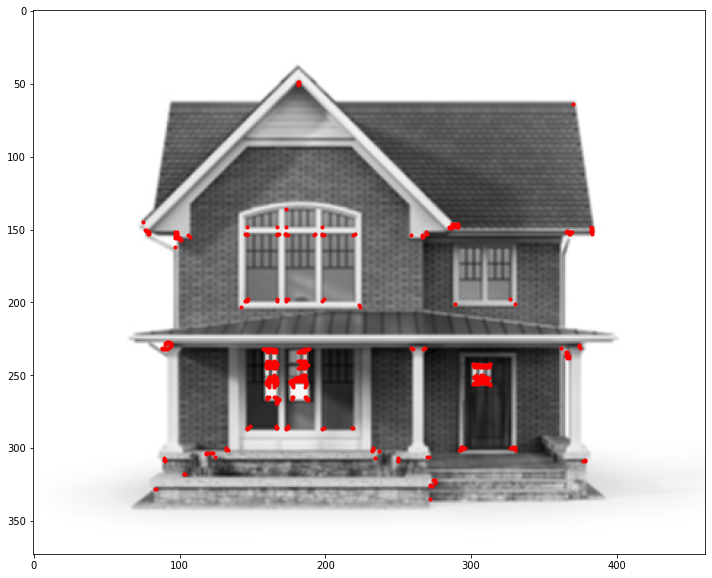

In [62]:
plt.figure(figsize=(20, 10))
plt.imshow(grayimg, cmap='gray')
plt.plot(a[:, 1], a[:, 0], 'r.')

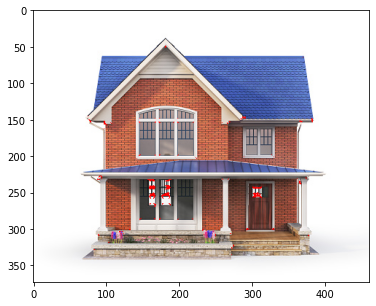

In [63]:
img_copy_for_corners = np.copy(image)
img_copy_for_edges = np.copy(image)
for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r >= th:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
    
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
#ax.set_title("corners found")
plt.figure(figsize=(10, 5))
plt.imshow(img_copy_for_corners, cmap='gray')
#ax[1].set_title("edges found")
#ax[1].imshow(img_copy_for_edges, cmap='gray')
plt.show()